# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 2 conflicts.


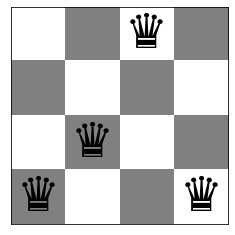

Queens (left to right) are at rows: [3 2 0 3]
Number of conflicts: 2


In [25]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 4 conflicts.


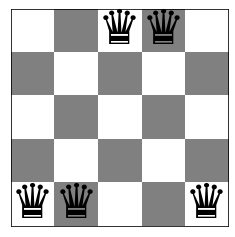

In [48]:
board[0] =4
show_board(board)

Board with 0 conflicts.


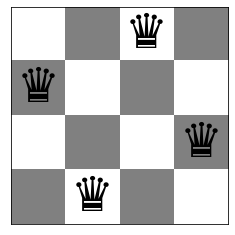

[1, 3, 0, 2]


In [49]:
board = [1,3,0,2]
show_board(board)
print(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [26]:
# calculates every possible move on the inputed board and returns the board where the move caused the least number of conflicts
def best_move(board):
    start = board.copy()
    copy = board.copy()
    main = board.copy()
    starting_conflicts = conflicts(board)
    min_conflicts = conflicts(board)
    for i in range(len(board)):
        check = board.copy()
        if board[i] == 0: # checks if queen is at top of the board
            board[i] += 1
            curr = conflicts(board)
        elif board[i] == len(board) - 1: # checks if queen is at the very bottom of the board
            board[i] -= 1
            curr = conflicts(board)
        else: # if it is in the middle it will check if going up or down causing less conflicts
            board[i] += 1
            check[i] -= 1
            down = conflicts(board)
            up = conflicts(check)
            if down > up:
                curr = up
                board = check.copy()
            elif up > down: curr = down
            else: curr = down # if they have the same number of conflicts then the queen will move down
        if curr < min_conflicts:
            min_conflicts = curr
            main = board.copy()
        board = copy.copy()
    if starting_conflicts == min_conflicts: # if no better board is discovered it returns the input board
        return start
    return main

In [27]:
# creates a board. Gets the best possible move for the board until there are no more better moves
def steep(size):
    board = random_board(size)
    least_conflicts = conflicts(board)
    while True:
        next = best_move(board).copy()
        curr_conflicts = conflicts(next)
        if curr_conflicts < least_conflicts:
            least_conflicts = curr_conflicts
        elif curr_conflicts == least_conflicts: return next
        board = next.copy()

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [5]:
# gets a random move and if it has less conflicts then it loops but if new move has more conflicts then a local optimum is reached
def stochastic(size):
    board = random_board(size)
    least_conflicts = conflicts(board)
    while True:
        next = random_move(board).copy()
        curr_conflicts = conflicts(next)
        if curr_conflicts < least_conflicts:
            least_conflicts = curr_conflicts
        elif curr_conflicts >= least_conflicts: return next
        board = next.copy()

In [4]:
# creates a list of boards with every possible current move then randomly returns one of the moves
def random_move(board):
    moves = []
    copy = board.copy()
    min_conflicts = conflicts(board)
    for i in range(len(board)):
        check = board.copy()
        if board[i] == 0:
            board[i] += 1
            curr = conflicts(board)
        elif board[i] == len(board) - 1:
            board[i] -= 1
            curr = conflicts(board)
        else:
            board[i] += 1
            check[i] -= 1
            down = conflicts(board)
            up = conflicts(check)
            if down > up:
                curr = up
                board = check.copy()
            elif up > down: curr = down
            else: curr = down
        if curr < min_conflicts:
            min_conflicts = curr
        moves.append(board)
        board = copy.copy()
    np.random.shuffle(moves) # shuffles board to randomly choose move
    return moves[0]

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [58]:
# keeps getting a random move until the number of conflicts is less than the current board. Then sets the least number of conflicts to the current number of conflicts.
# Returns board once conflicts equals zero or the number of tries has been exceeded
def stochastic2(size):
    board = random_board(size)
    least_conflicts = conflicts(board)
    tries = 10000 # set to the number of times you want it to try to find a local optima
    n = 0
    while True:
        next = first_choice(board).copy()
        curr_conflicts = conflicts(next)
        while curr_conflicts >= least_conflicts:
            next = first_choice(board).copy()
            curr_conflicts = conflicts(next)
            n += 1
            if n >= tries:
                return board
        n = 0
        if curr_conflicts < least_conflicts:
            least_conflicts = curr_conflicts
        if least_conflicts == 0: return next
        board = next.copy()

2

In [6]:
# returns a random move
def first_choice(b):
    board = b.copy()
    upOrDown = [-1, 1]
    rand = np.random.randint(0,len(board)-1) # randomly chooses a column to move queen in
    if board[rand] == 0:
        board[rand] += 1
    elif board[rand] == len(board)-1:
        board[rand] -= 1
    else:
        np.random.shuffle(upOrDown) # randomly chooses to move queen up or down
        board[rand] += upOrDown[0]
    return board

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

STEEP
Board with 2 conflicts.


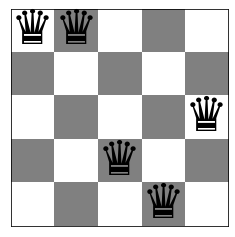

Board with 1 conflicts.


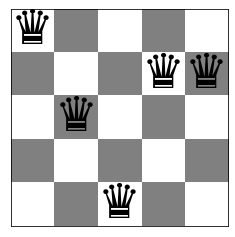

Board with 0 conflicts.


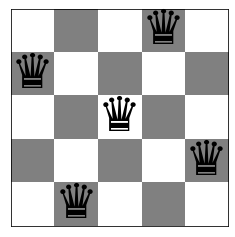

FINISHED
STOCH1
Board with 4 conflicts.


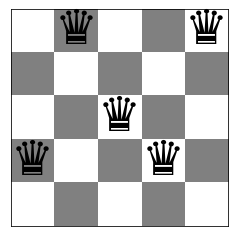

Board with 2 conflicts.


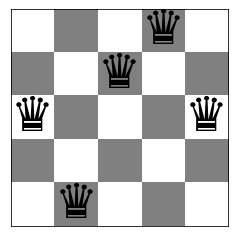

Board with 1 conflicts.


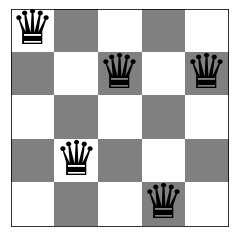

STOCH2
Board with 2 conflicts.


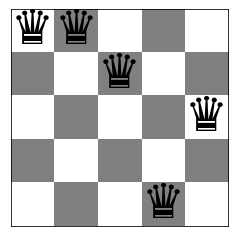

Board with 0 conflicts.


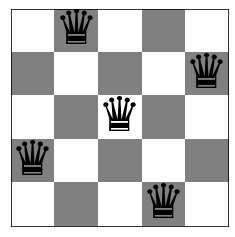

Finished


In [86]:
# runs each of the 3 algorithms 100 times or until the ideal situation is found
def random_restarts(size):
    # first the steepeset algorithm
    best_board = steep(size).copy()
    print('STEEP')
    show_board(best_board)
    for i in range(100):
        s_new = steep(size).copy()
        if conflicts(s_new) < conflicts(best_board):
            show_board(s_new)
            best_board = s_new.copy()
        if conflicts(best_board) == 0:
            print("FINISHED")
            break
    # next the 1st stochastic algorithm
    best_board = stochastic(size).copy()
    print("STOCH1")
    show_board(best_board)
    for i in range(100):
        stoch_new = stochastic(size).copy()
        new = conflicts(stoch_new)
        best = conflicts(best_board)
        if new < best:
            show_board(stoch_new)
            best_board = stoch_new.copy()
        if conflicts(best_board) == 0:
            print('FINISHED')
            break
    # finally the 2nd stochastic algorithm
    print("STOCH2")
    old = stochastic2(size).copy()
    best_board = old.copy()
    show_board(old)
    for i in range(100):
        new = stochastic2(size).copy()
        if conflicts(new) < conflicts(best_board):
            show_board(new)
            best_board = new.copy()
        if conflicts(best_board) == 0:
            print('Finished')
            break
test = random_restarts(5)

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [64]:
# calculates the average time and average number of conflicts at varing conflicts
import time
sizes = [5, 10, 15, 20, 25]
avg_time = 0
total_time = 0
total_cons = 0
print('STEEP')
print('size | avg time | conflicts')
for size in sizes:
    total_time = 0
    total_cons = 0
    for i in range(10):
        start = time.time()
        board = steep(size).copy()
        end = time.time()
        total_time += (end - start)
        total_cons += conflicts(board)
    avg_time = total_time / 10
    avg_cons = total_cons / 10
    print(size, '| ', round(avg_time*1000,6), '  |  ', avg_cons)


STEEP
size | avg time | conflicts
5 |  0.263286   |   2.1
10 |  0.92988   |   4.5
15 |  2.595377   |   7.2
20 |  4.865479   |   9.0
25 |  9.658742   |   12.1


In [65]:
sizes = [5, 10, 15, 20, 25]
avg_time = 0
total_time = 0
total_cons = 0
print('stochastic 1')
print('size | avg time   | conflicts')
for size in sizes:
    total_time = 0
    total_cons = 0
    for i in range(10):
        start = time.time()
        board = stochastic(size).copy()
        end = time.time()
        total_time += (end - start)
        total_cons += conflicts(board)
    avg_time = total_time / 10
    avg_cons = total_cons / 10
    print(size, '| ', round(avg_time*1000,6), '   | ', avg_cons)

stochastic 1
size | avg time   | conflicts
5 |  0.221968    |  5.2
10 |  0.405788    |  11.6
15 |  0.851059    |  15.2
20 |  1.314187    |  20.8
25 |  1.819277    |  27.7


In [66]:
sizes = [5, 10, 15, 20, 25]
avg_time = 0
total_time = 0
total_cons = 0
print('stochastic 2')
print('size | avg time    | conflicts')
for size in sizes:
    total_time = 0
    total_cons = 0
    for i in range(10):
        start = time.time()
        board = stochastic2(size).copy()
        end = time.time()
        total_time += (end - start)
        total_cons += conflicts(board)
    avg_time = total_time / 10
    avg_cons = total_cons / 10
    print(size, '| ', round(avg_time*1000,6), '| ', avg_cons)

stochastic 2
size | avg time    | conflicts
5 |  52.181649 |  1.9
10 |  109.885836 |  4.4
15 |  147.348452 |  7.2
20 |  190.874743 |  10.3
25 |  235.575938 |  11.8


In [93]:
# determining largest size for each algorithm
start = time.time()
s = steep(200)
end = time.time()
x = conflicts(s)
print(x, 'time: ', (end-start)*1000)

101 time:  4130.038022994995


In [96]:
start = time.time()
s = stochastic(1000)
end = time.time()
x = conflicts(s)
print(x, 'time: ', (end-start)*1000)

1154 time:  3251.9350051879883


In [100]:
start = time.time()
s = stochastic2(400)
end = time.time()
x = conflicts(s)
print(x, 'time: ', (end-start)*1000)

206 time:  4183.388710021973


In [77]:
# create dataframes for each size that I tested
import pandas as pd
import numpy as np
from IPython.display import display
arr = ['avg_time', 'avg_conflicts']
rows = ['steep', 'stochastic1', 'stochastic2']
steep5 = [0.263286, 2.1]
stoch5 = [0.221968, 5.2]
stoch2_5 = [52.181649, 1.9]
five = np.array([steep5, stoch5, stoch2_5])
df_five = pd.DataFrame(five, columns = arr, index=rows)
print('Size 5')
display(df_five)
steep10 = [0.92988, 4.5]
stoch10 = [0.405788, 11.6]
stoch2_10 = [109.885836, 4.4]
ten = np.array([steep10, stoch10, stoch2_10])
df_ten = pd.DataFrame(ten, columns = arr, index=rows)
print('Size 10')
display(df_ten)
steep15 = [2.595377, 7.2]
stoch15 = [0.851059, 15.2]
stoch2_15 = [147.348452, 7.2]
fifthteen = np.array([steep15, stoch15, stoch2_15])
df_fifthteen = pd.DataFrame(fifthteen, columns = arr, index=rows)
print('Size 15')
display(df_fifthteen)
steep20 = [4.865479, 9.0]
stoch20 = [1.314187, 20.8]
stoch2_20 = [190.874743, 10.3]
twenty = np.array([steep20, stoch20, stoch2_20])
df_twenty = pd.DataFrame(twenty, columns = arr, index=rows)
print('Size 20')
display(df_twenty)
steep25 = [9.658742, 12.1]
stoch25 = [1.819277, 27.7]
stoch2_25 = [235.575938, 11.8]
twenty_five = np.array([steep25, stoch25, stoch2_25])
df_twenty_five = pd.DataFrame(twenty_five, columns = arr, index=rows)
print('Size 25')
display(df_twenty_five)

Size 5


,avg_time,avg_conflicts
steep,0.263286,2.1
stochastic1,0.221968,5.2
stochastic2,52.181649,1.9


Size 10


,avg_time,avg_conflicts
steep,0.929880,4.5
stochastic1,0.405788,11.6
stochastic2,109.885836,4.4


Size 15


,avg_time,avg_conflicts
steep,2.595377,7.2
stochastic1,0.851059,15.2
stochastic2,147.348452,7.2


Size 20


,avg_time,avg_conflicts
steep,4.865479,9.0
stochastic1,1.314187,20.8
stochastic2,190.874743,10.3


Size 25


,avg_time,avg_conflicts
steep,9.658742,12.1
stochastic1,1.819277,27.7
stochastic2,235.575938,11.8


In [83]:
df_five = df_five.transpose()
df_fifthteen = df_fifthteen.transpose()
df_twenty_five = df_twenty_five.transpose()

<AxesSubplot:>

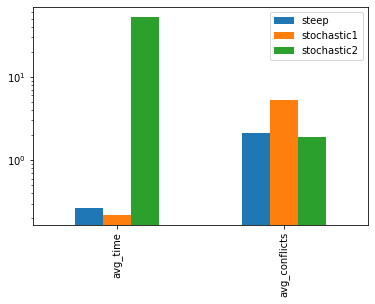

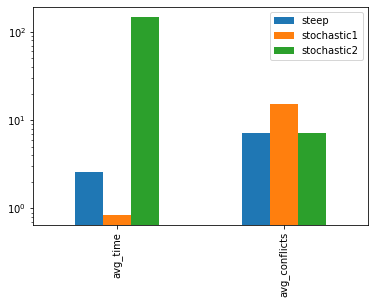

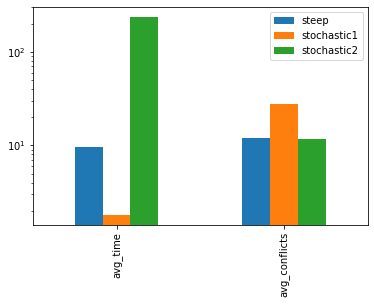

In [85]:
# bargraphs at varying sizes
df_five.plot(kind='bar', logy=True)
df_fifthteen.plot(kind='bar', logy=True)
df_twenty_five.plot(kind='bar', logy=True)

Looking at these graphs it is very apparent that the 2nd stochastic hill climbing algorithm takes longer at every single input size. This is very dependent on how many tries you set it to allow. Even though it takes the most time it has the least number of average conflicts meaning that it does that best job solving the puzzle every time. The steepest hill climbing algorithm is very close behind in average conflicts and considering the big difference in time, makes the steepest algorithm pretty optimal. The first stochastic hill climbing algorithm is exponentially the fastest algorithm to find a local maximum because it is randomly selecting the next move making it quick to find one. I feel that if I limited the number of tries for the 2nd stochastic hill climbing algorithm it is possible that timing would have gone down quite a bit without the average conflicts increasing that much. The largest reasonable size for the steepest hill climbing algo was around 200, for the 1st stochastic hill climbing algorithm was around 1000, and for the 2nd stochastic hill climbing algorithm was around 400.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [9]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [10]:
# Code and description go here